In [52]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
X_train = pd.read_csv('X_train.csv')
X_test = pd.read_csv('X_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import pickle

In [68]:
def save_model(model,filename):
    pickle.dump(model, open('models/'+filename, 'wb'))

def Model_score(filename):
    loaded_model = pickle.load(open('models/'+filename, 'rb'))
    result = loaded_model.score(X_test, y_test)
    return result

In [20]:
LR_pipe = Pipeline([('logistic',LogisticRegression())])
LR_pipe.fit(X_train,y_train)

C:\Users\Rao\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\Rao\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('logistic', LogisticRegression())])

In [23]:
save_model(LR_pipe,'LogisticRegression.sav')

In [22]:
DC_pipe = Pipeline([('Decision',DecisionTreeClassifier(random_state=0))])
DC_pipe.fit(X_train,y_train)

Pipeline(steps=[('Decision', DecisionTreeClassifier(random_state=0))])

In [19]:
save_model(DC_pipe,'DecisionTree.sav')

In [24]:
from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini'], 'splitter':['best'], 'min_samples_split':[100,200,300,400,500,600,700,800,900], 'random_state':[42]}
clf = GridSearchCV(DecisionTreeClassifier(),parameters, cv = 10, return_train_score=False)

In [25]:
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini'],
                         'min_samples_split': [100, 200, 300, 400, 500, 600,
                                               700, 800, 900],
                         'random_state': [42], 'splitter': ['best']})

In [36]:
clf.best_estimator_

DecisionTreeClassifier(min_samples_split=400, random_state=42)

In [33]:
save_model(clf,'ParameterTuned_DecisionTree.sav')

In [ ]:
clf_df = pd.DataFrame(clf.cv_results_)
clf_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_min_samples_split,param_random_state,param_splitter,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,2.322927,0.021887,0.057102,0.016250,gini,100,42,best,"{'criterion': 'gini', 'min_samples_split': 100, 'random_state': 42, 'splitter': 'best'}",0.827361,...,0.822635,0.818510,0.827877,0.826072,0.823150,0.822190,0.829323,0.824144,0.003203,9
1,2.284074,0.119610,0.056250,0.020484,gini,200,42,best,"{'criterion': 'gini', 'min_samples_split': 200, 'random_state': 42, 'splitter': 'best'}",0.832259,...,0.823408,0.827619,0.832087,0.831915,0.825041,0.826487,0.837229,0.829670,0.003926,8
2,2.196892,0.092561,0.072141,0.017579,gini,300,42,best,"{'criterion': 'gini', 'min_samples_split': 300, 'random_state': 42, 'splitter': 'best'}",0.835782,...,0.826674,0.830455,0.832431,0.835611,0.830541,0.829495,0.837229,0.832170,0.003083,4
3,2.026186,0.076375,0.049883,0.023236,gini,400,42,best,"{'criterion': 'gini', 'min_samples_split': 400, 'random_state': 42, 'splitter': 'best'}",0.837329,...,0.829166,0.829595,0.832947,0.837243,0.832345,0.829924,0.837229,0.833141,0.003086,1
4,1.933642,0.038740,0.052740,0.023295,gini,500,42,best,"{'criterion': 'gini', 'min_samples_split': 500, 'random_state': 42, 'splitter': 'best'}",0.838274,...,0.826588,0.831142,0.833548,0.837071,0.829681,0.831128,0.835940,0.832823,0.003463,2


In [ ]:
print('Best Score :',clf.best_score_,'Best Params :',clf.best_params_)

Best Score : 0.8331414209303176 Best Params : {'criterion': 'gini', 'min_samples_split': 400, 'random_state': 42, 'splitter': 'best'}


In [39]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
# Initialze the estimators
clf1 = RandomForestClassifier(random_state=42)
# clf2 = SVC(probability=True, random_state=42)
# clf3 = LogisticRegression(random_state=42)
# clf4 = DecisionTreeClassifier(random_state=42)
# clf5 = KNeighborsClassifier()
# clf6 = MultinomialNB()
# clf7 = GradientBoostingClassifier(random_state=42)

In [42]:
# Initiaze the hyperparameters for each dictionary
param1 = {}
param1['classifier__n_estimators'] = [10, 50, 100, 250]
param1['classifier__max_depth'] = [5, 10, 20]
# param1['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
param1['classifier'] = [clf1]

# param2 = {}
# param2['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
# param2['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
# param2['classifier'] = [clf2]

# param3 = {}
# param3['classifier__C'] = [10**-2, 10**-1, 10**0, 10**1, 10**2]
# param3['classifier__penalty'] = ['l1', 'l2']
# param3['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
# param3['classifier'] = [clf3]

# param4 = {}
# param4['classifier__max_depth'] = [5,10,25,None]
# param4['classifier__min_samples_split'] = [2,5,10]
# param4['classifier__class_weight'] = [None, {0:1,1:5}, {0:1,1:10}, {0:1,1:25}]
# param4['classifier'] = [clf4]

# param5 = {}
# param5['classifier__n_neighbors'] = [2,5,10,25,50]
# param5['classifier'] = [clf5]

# param6 = {}
# param6['classifier__alpha'] = [10**0, 10**1, 10**2]
# param6['classifier'] = [clf6]

# param7 = {}
# param7['classifier__n_estimators'] = [10, 50, 100, 250]
# param7['classifier__max_depth'] = [5, 10, 20]
# param7['classifier'] = [clf7]

In [43]:
pipeline = Pipeline([('RandomForest', clf1)])
# params = [param1, param2, param3, param4, param5, param6, param7]
params = [param1]

In [44]:
from sklearn.model_selection import GridSearchCV
# Train the grid search model
gs = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train)

C:\Users\Rao\anaconda3\lib\site-packages\sklearn\pipeline.py:346: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


In [45]:
gs.best_params_

{'classifier': RandomForestClassifier(max_depth=20, n_estimators=250, random_state=42),
 'classifier__max_depth': 20,
 'classifier__n_estimators': 250}

In [46]:
save_model(gs,'RandomForest.sav')

In [77]:
import os

models = os.listdir('models/')

In [78]:
score = []
for i in range(0,len(models)):
    score.append(Model_score(models[i]) * 100)

<BarContainer object of 4 artists>

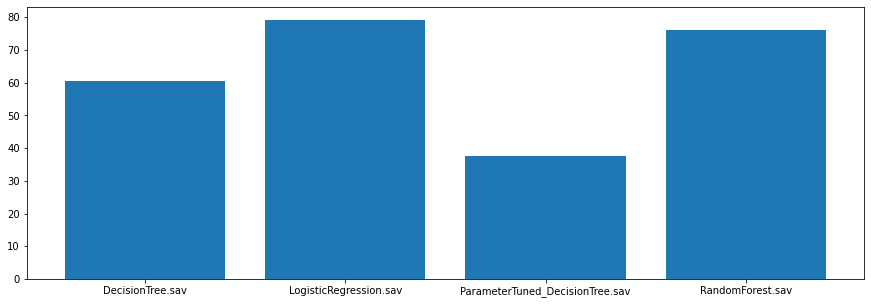

In [79]:
plt.figure(figsize=(15,5))
plt.bar(models,score)